<a href="https://colab.research.google.com/github/Srushtirodge/Customer-Purchase-Behavior-Analysis-using-Descriptive-Statistics/blob/main/Copy_of_Applied_Statistics_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customer Purchase Behavior Analysis using Descriptive Statistics

**Github link :**

https://github.com/Srushtirodge/Customer-Purchase-Behavior-Analysis-using-Descriptive-Statistics/blob/main/Copy_of_Applied_Statistics_Project.ipynb

##Problem Statement

🔍 **Problem Statement**:

Welcome to the Probability and Statistics project! 📊🔍 In this exciting journey, you'll get the chance to apply the concepts you've learned in probability theory and statistics to analyze a real-world dataset. This project is your opportunity to dive deep into the world of data analysis and gain practical experience with the tools and techniques you've been learning. 🚀

🎯 **Objective**:

Your mission is to analyze the provided dataset containing customer information and purchasing behavior to make informed decisions. Your goal is to identify patterns, trends, and correlations that will help your company optimize its marketing efforts and increase offer acceptance rates. 🎉

##About the Dataset



Here's the link to the [dataset](https://docs.google.com/spreadsheets/d/12ln9iTNcVNOMYi_AU-OczKpa_KIP8XyVbsjk81Na8Yk/edit?usp=sharing)


This data was gathered during last year's campaign.
Data description is as follows;

1. Response (target) - 1 if customer accepted the offer in the last campaign, 0 otherwise
1. ID - Unique ID of each customer
1. Year_Birth - Age of the customer
1. Complain - 1 if the customer complained in the last 2 years
1. Dt_Customer - date of customer's enrollment with the company
1. Education - customer's level of education
1. Marital - customer's marital status
1. Kidhome - number of small children in customer's household
1. Teenhome - number of teenagers in customer's household
1. Income - customer's yearly household income
1. MntFishProducts - the amount spent on fish products in the last 2 years
1. MntMeatProducts - the amount spent on meat products in the last 2 years
1. MntFruits - the amount spent on fruits products in the last 2 years
1. MntSweetProducts - amount spent on sweet products in the last 2 years
1. MntWines - the amount spent on wine products in the last 2 years
1. MntGoldProds - the amount spent on gold products in the last 2 years
1. NumDealsPurchases - number of purchases made with discount
1. NumCatalogPurchases - number of purchases made using catalog (buying goods to be shipped through the mail)
1. NumStorePurchases - number of purchases made directly in stores
1. NumWebPurchases - number of purchases made through the company's website
1. NumWebVisitsMonth - number of visits to company's website in the last month
1. Recency - number of days since the last purchase





In [ ]:
# To help with reading and manipulating data
import pandas as pd
import numpy as np

# To help with data visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# To be used for missing value imputation
from sklearn.impute import SimpleImputer

# To help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (AdaBoostClassifier,GradientBoostingClassifier,RandomForestClassifier,
    BaggingClassifier)

# To get different metric scores, and split data
from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import (f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score
)

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
# To be used for tuning the model
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# To be used for creating pipelines and personalizing them
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer


# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To supress warnings
import warnings

warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/project module 5/Copy of Superstore Marketing Data.csv")

In [ ]:
df.head()

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.000,0,0,6/16/2014,0,189,104,379,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.000,0,0,6/15/2014,0,464,5,64,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.000,0,1,5/13/2014,0,134,11,59,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.000,1,1,########,0,10,0,1,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.000,1,0,########,0,6,16,24,11,0,34,2,3,1,2,7,1,0


In [ ]:
df.shape

(2240, 22)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Id,2240.000,NaN,NaN,NaN,5592.160,3246.662,0.000,2828.250,5458.500,8427.750,11191.000
Year_Birth,2240.000,NaN,NaN,NaN,1968.806,11.984,1893.000,1959.000,1970.000,1977.000,1996.000
Education,2240,5,Graduation,1127,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marital_Status,2240,8,Married,864,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Income,2216.000,NaN,NaN,NaN,52247.251,25173.077,1730.000,35303.000,51381.500,68522.000,666666.000
Kidhome,2240.000,NaN,NaN,NaN,0.444,0.538,0.000,0.000,0.000,1.000,2.000
Teenhome,2240.000,NaN,NaN,NaN,0.506,0.545,0.000,0.000,0.000,1.000,2.000
Dt_Customer,2240,401,########,916,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Recency,2240.000,NaN,NaN,NaN,49.109,28.962,0.000,24.000,49.000,74.000,99.000
MntWines,2240.000,NaN,NaN,NaN,303.936,336.597,0.000,23.750,173.500,504.250,1493.000


In [ ]:
# let's check for duplicate values in the data
df.duplicated().sum()

0

In [ ]:
# let's check for missing values in the data
round(df.isnull().sum() / df.isnull().count() * 100, 2)

Id                    0.000
Year_Birth            0.000
Education             0.000
Marital_Status        0.000
Income                1.070
Kidhome               0.000
Teenhome              0.000
Dt_Customer           0.000
Recency               0.000
MntWines              0.000
MntFruits             0.000
MntMeatProducts       0.000
MntFishProducts       0.000
MntSweetProducts      0.000
MntGoldProds          0.000
NumDealsPurchases     0.000
NumWebPurchases       0.000
NumCatalogPurchases   0.000
NumStorePurchases     0.000
NumWebVisitsMonth     0.000
Response              0.000
Complain              0.000
dtype: float64

In [ ]:
data = df.copy()

In [ ]:
data.drop(columns=["Id"], inplace=True)

In [ ]:
# Replace "########" with NaN in the "Dt_Customer" column
df['Dt_Customer'] = df['Dt_Customer'].replace('########', pd.NA)


# Drop rows with missing values in the "Dt_Customer" column
df = df.dropna(subset=['Dt_Customer'])

In [ ]:
# Convert the "Dt_Customer" column to a datetime object
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], errors='coerce')

In [ ]:
# To calculate age we'll subtract the year 2021 because variables account for the last 2 years
# and we have customers registered till 2014 only
# We need to convert strings values to dates first to use subtraction
data["Age"] = 2021 - pd.to_datetime(data["Year_Birth"], format="%Y").apply(lambda x: x.year)

data["Age"].sort_values()

562      25
1824     25
697      26
1468     26
964      26
       ... 
1740     80
2171     81
2233    121
827     122
513     128
Name: Age, Length: 2240, dtype: int64

In [ ]:
data[data["Age"] > 100]

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Age
513,1893,2n Cycle,Single,60182.000,0,1,5/17/2014,23,8,0,5,7,0,2,1,1,0,2,4,0,0,128
827,1899,PhD,Together,83532.000,0,0,9/26/2013,36,755,144,562,104,64,224,1,4,6,4,1,0,0,122
2233,1900,2n Cycle,Divorced,36640.000,1,0,9/26/2013,99,15,6,8,7,4,25,1,2,1,2,5,0,1,121


In [ ]:
# Dropping the 3 observations with age > 100
data.drop(data[data["Age"] > 100].index, inplace=True)

In [ ]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%m/%d/%Y', errors='coerce')

In [ ]:
data.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Age
0,1970,Graduation,Divorced,84835.000,0,0,6/16/2014,0,189,104,379,111,189,218,1,4,4,6,1,1,0,51
1,1961,Graduation,Single,57091.000,0,0,6/15/2014,0,464,5,64,7,0,37,1,7,3,7,5,1,0,60
2,1958,Graduation,Married,67267.000,0,1,5/13/2014,0,134,11,59,15,2,30,1,3,2,5,2,0,0,63
3,1967,Graduation,Together,32474.000,1,1,########,0,10,0,1,0,0,0,1,1,0,2,7,0,0,54
4,1989,Graduation,Single,21474.000,1,0,########,0,6,16,24,11,0,34,2,3,1,2,7,1,0,32


In [ ]:
# Making a list of all categorical variables
cat_col = [
    "Education",
    "Marital_Status",
    "Kidhome",
    "Teenhome",
    "Complain",
    "Response",

]

# Printing number of count of each unique value in each column
for column in cat_col:
    print(data[column].value_counts())
    print("-" * 40)

Graduation    1127
PhD            485
Master         370
2n Cycle       201
Basic           54
Name: Education, dtype: int64
----------------------------------------
Married     864
Together    579
Single      479
Divorced    231
Widow        77
Alone         3
YOLO          2
Absurd        2
Name: Marital_Status, dtype: int64
----------------------------------------
0    1291
1     898
2      48
Name: Kidhome, dtype: int64
----------------------------------------
0    1156
1    1029
2      52
Name: Teenhome, dtype: int64
----------------------------------------
0    2217
1      20
Name: Complain, dtype: int64
----------------------------------------
0    1903
1     334
Name: Response, dtype: int64
----------------------------------------


In [ ]:
# Replacing 2n Cycle with Master
data["Education"] = data["Education"].replace("2n Cycle", "Master")

In [ ]:
# Replacing YOLO, Alone, Absurd with single and Together with Married
data["Marital_Status"] = data["Marital_Status"].replace(["YOLO", "Alone", "Absurd"], "Single")
data["Marital_Status"] = data["Marital_Status"].replace(["Together"], "Married")

In [ ]:
data["Total_Amount_Spent"] = data[
    [
        "MntWines",
        "MntFruits",
        "MntMeatProducts",
        "MntFishProducts",
        "MntSweetProducts",
        "MntGoldProds",
    ]
].sum(axis=1)

In [ ]:
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):

    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower  left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

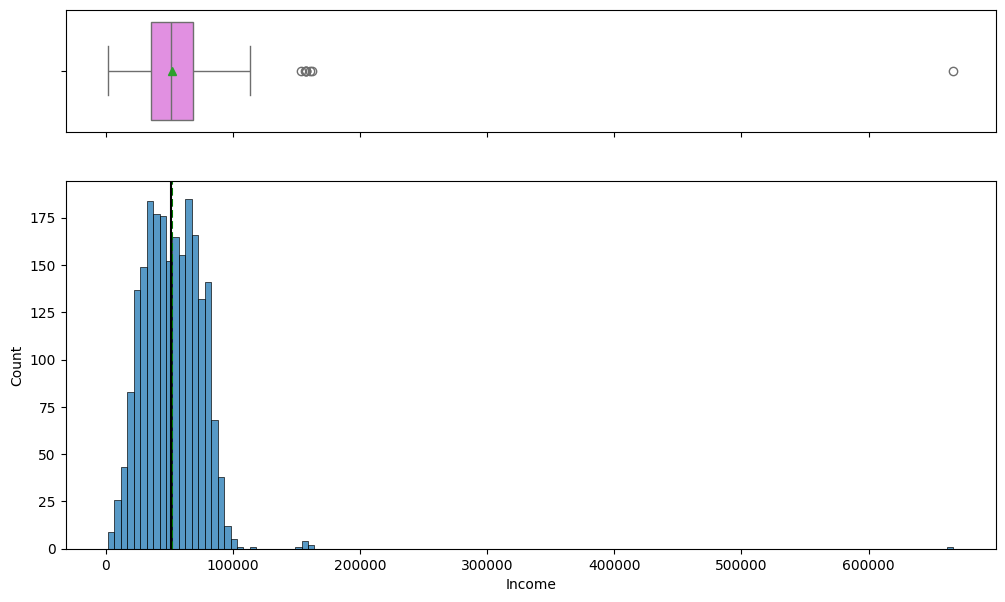

In [ ]:
# observations on Income
histogram_boxplot(data, "Income")

In [ ]:
data[data["Income"] > 200000]

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Age,Total_Amount_Spent
527,1977,Graduation,Married,666666.000,1,0,########,23,9,14,18,8,1,12,4,3,1,3,6,0,0,44,62


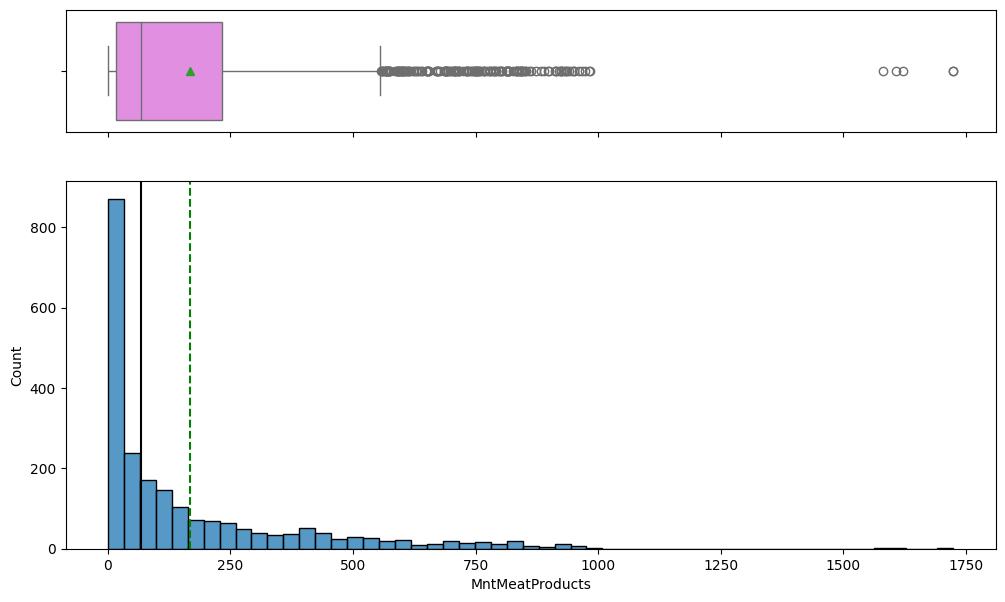

In [ ]:
# observations on MntMeatProducts
histogram_boxplot(data, "MntMeatProducts")

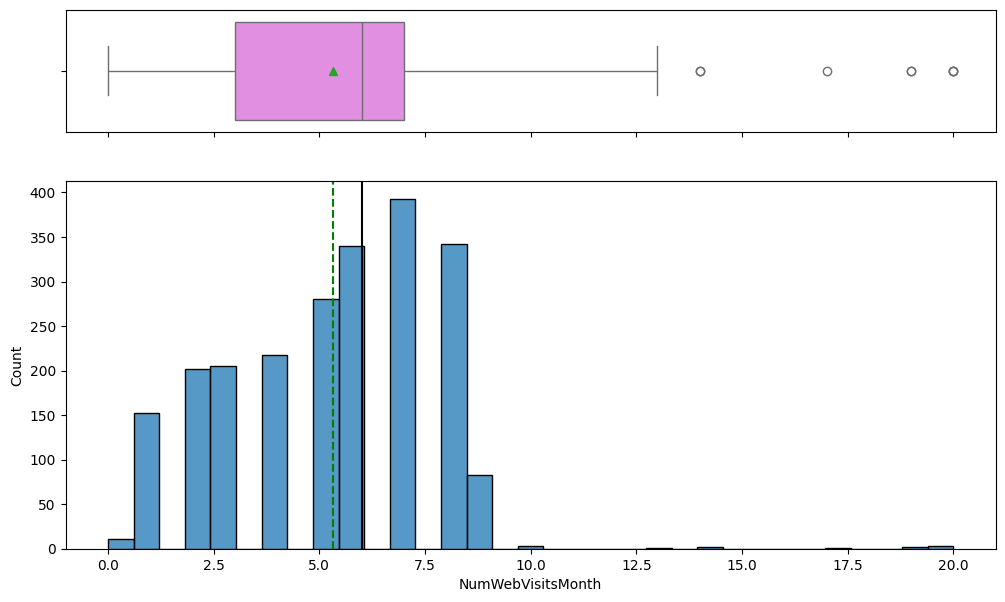

In [ ]:
# observations on NumWebVisitsMonth
histogram_boxplot(data, "NumWebVisitsMonth")

In [ ]:
data[data["NumCatalogPurchases"] > 15]

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Age,Total_Amount_Spent
325,1977,Graduation,Married,157146.000,0,0,4/29/2013,13,1,0,1725,2,1,1,0,0,28,0,1,0,0,44,1730
497,1982,PhD,Married,160803.000,0,0,########,21,55,16,1622,17,3,4,15,0,28,1,0,0,0,39,1717
961,1979,Graduation,Married,2447.000,1,0,########,42,1,1,1725,1,1,1,15,0,28,0,1,0,0,42,1730
2204,1973,PhD,Married,157243.000,0,1,########,98,20,2,1582,1,2,1,15,0,22,0,0,0,0,48,1608


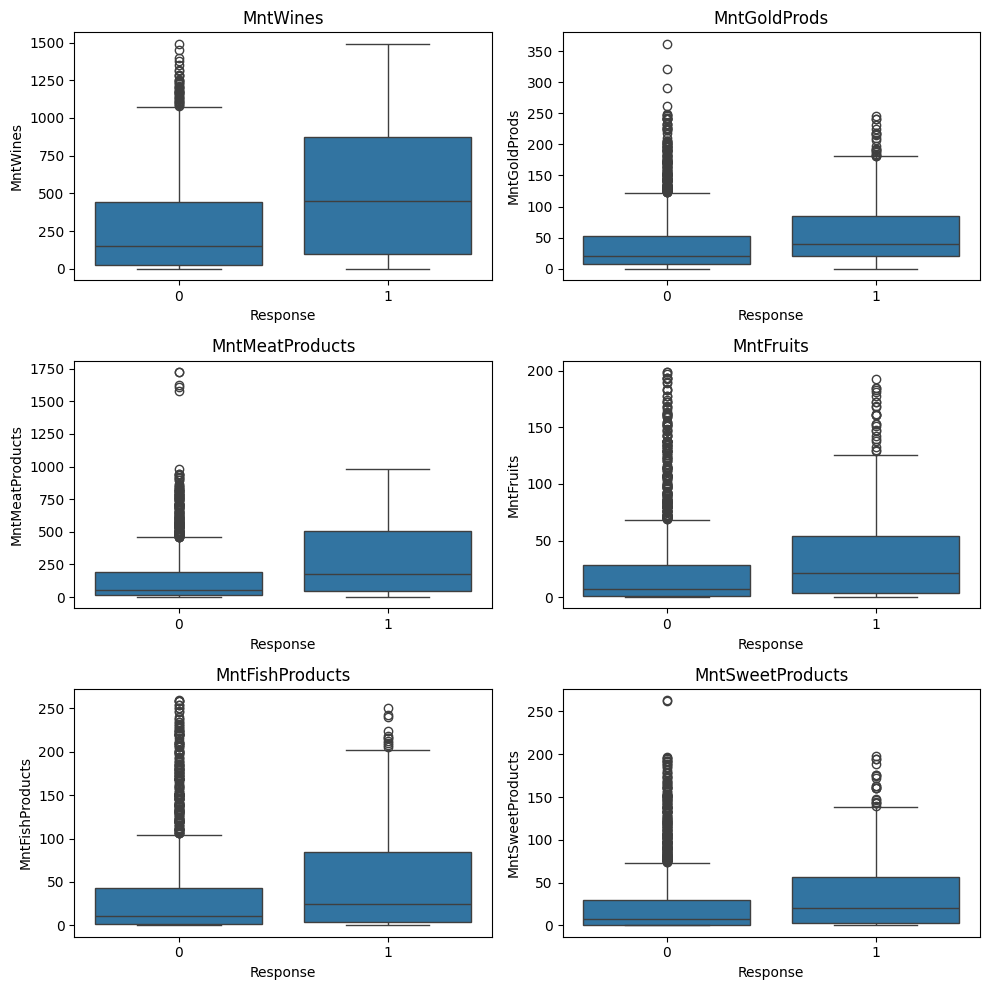

In [ ]:
cols = data[
    [
        "MntWines",
        "MntGoldProds",
        "MntMeatProducts",
        "MntFruits",
        "MntFishProducts",
        "MntSweetProducts",
    ]
].columns.tolist()

plt.figure(figsize=(10, 10))

for i, variable in enumerate(cols):
    plt.subplot(3, 2, i + 1)
    sns.boxplot(x=data["Response"], y=data[variable])  # Corrected argument order
    plt.tight_layout()
    plt.title(variable)

plt.show()


<Axes: xlabel='Income', ylabel='Total_Amount_Spent'>

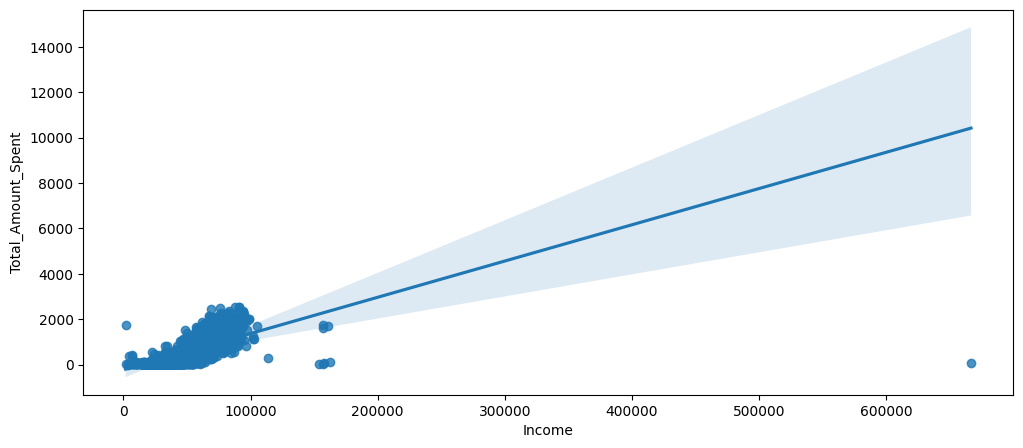

In [ ]:
plt.figure(figsize=(12, 5))
sns.regplot(y=data.Total_Amount_Spent, x=data.Income)

In [ ]:
data1 = data.copy()

In [ ]:
# Dropping birth year and Dt_Customer columns
data1.drop(
    columns=[
        "Year_Birth",
        "Dt_Customer",

        "Total_Amount_Spent",
    ],
    inplace=True,
)

In [ ]:
# Separating target variable and other variables
X = data1.drop(columns="Response")
X = pd.get_dummies(X)

Y = data1["Response"]


In [ ]:
# Splitting data into training, validation and test set:
# first we split data into 2 parts, say temporary and test

X_temp, X_test, y_temp, y_test = train_test_split(X, Y, test_size=0.2, random_state=1, stratify=Y)

# then we split the temporary set into train and validation

X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp)


print(X_train.shape, X_val.shape, X_test.shape)

(1341, 25) (448, 25) (448, 25)


In [ ]:
imputer = SimpleImputer(strategy="median")

In [ ]:
# Fit and transform the train data
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)

# Transform the validation data
X_val = pd.DataFrame(imputer.transform(X_val), columns=X_train.columns)

# Transform the test data
X_test = pd.DataFrame(imputer.transform(X_test), columns=X_train.columns)

In [ ]:
# Checking that no column has missing values in train or test sets
print(X_train.isna().sum())
print("-" * 30)
print(X_val.isna().sum())
print("-" * 30)
print(X_test.isna().sum())

Income                     0
Kidhome                    0
Teenhome                   0
Recency                    0
MntWines                   0
MntFruits                  0
MntMeatProducts            0
MntFishProducts            0
MntSweetProducts           0
MntGoldProds               0
NumDealsPurchases          0
NumWebPurchases            0
NumCatalogPurchases        0
NumStorePurchases          0
NumWebVisitsMonth          0
Complain                   0
Age                        0
Education_Basic            0
Education_Graduation       0
Education_Master           0
Education_PhD              0
Marital_Status_Divorced    0
Marital_Status_Married     0
Marital_Status_Single      0
Marital_Status_Widow       0
dtype: int64
------------------------------
Income                     0
Kidhome                    0
Teenhome                   0
Recency                    0
MntWines                   0
MntFruits                  0
MntMeatProducts            0
MntFishProducts            0

In [ ]:
scorer = metrics.make_scorer(metrics.recall_score)

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [ ]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))

results1 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models
print("\n" "Cross-Validation performance on training dataset:" "\n")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring = scorer,cv=kfold
    )
    results1.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))



Cross-Validation performance on training dataset:

Bagging: 0.28
Random forest: 0.23000000000000004
GBM: 0.33999999999999997
Adaboost: 0.33
dtree: 0.4

Validation Performance:

Bagging: 0.26865671641791045
Random forest: 0.208955223880597
GBM: 0.26865671641791045
Adaboost: 0.26865671641791045
dtree: 0.3880597014925373


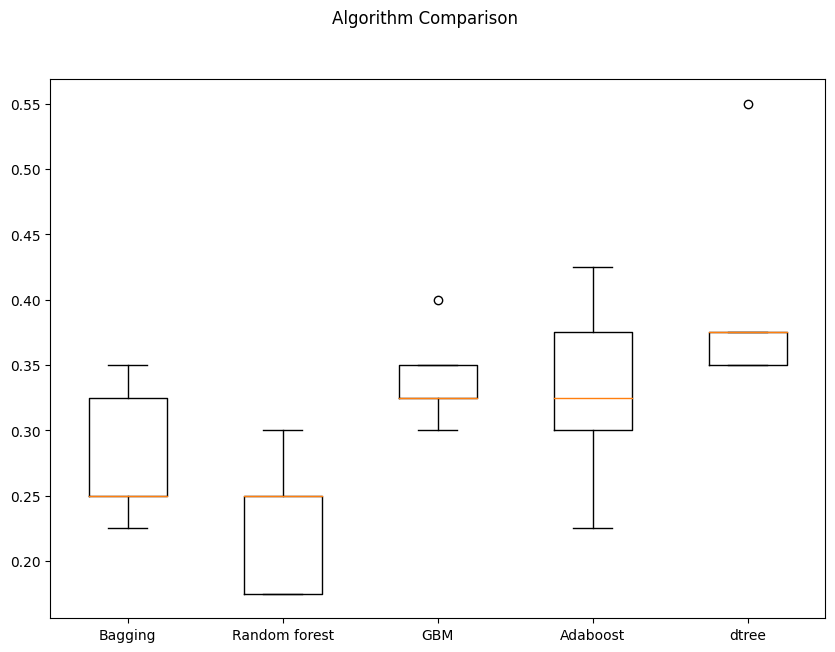

In [ ]:
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results1)
ax.set_xticklabels(names)

plt.show()

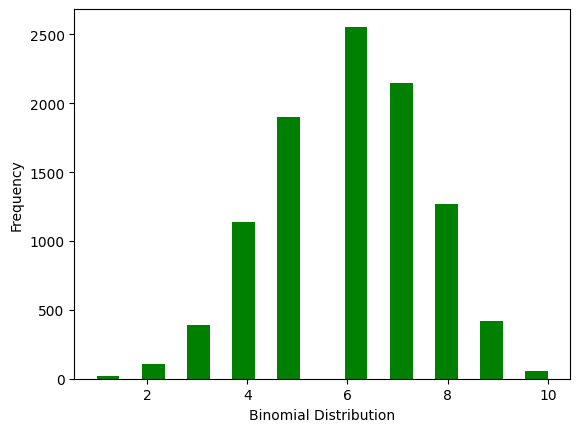

In [ ]:
# import packages
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# generate data
# n== number of trials,p== probability of each trial
n, p = 10, .6
data = np.random.binomial(n, p, 10000)

# plotting a histogram
ax = sns.distplot(data,
                  bins=20,
                  kde=False,
                  color='green',
                  hist_kws={"linewidth": 15, 'alpha': 1})
ax.set(xlabel='Binomial Distribution', ylabel='Frequency')

plt.show()

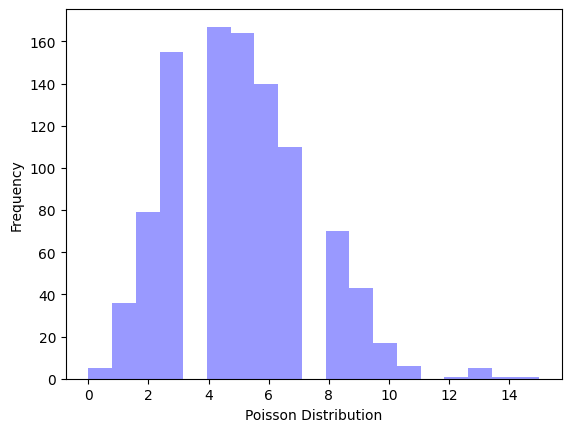

In [ ]:
poisson_data = np.random.poisson(lam=5, size=1000)

# plotting a histogram
ax = sns.distplot(poisson_data,
                  kde=False,
                  color='blue')
ax.set(xlabel='Poisson Distribution', ylabel='Frequency')

plt.show()

In [ ]:
def normal_dist(x, mean, sd):
    prob_density = (np.pi*sd) * np.exp(-0.5*((x-mean)/sd)**2)
    return prob_density

mean = 0
sd = 1
x = 1
result = normal_dist(x, mean, sd)
print(result)

1.9054722647301798


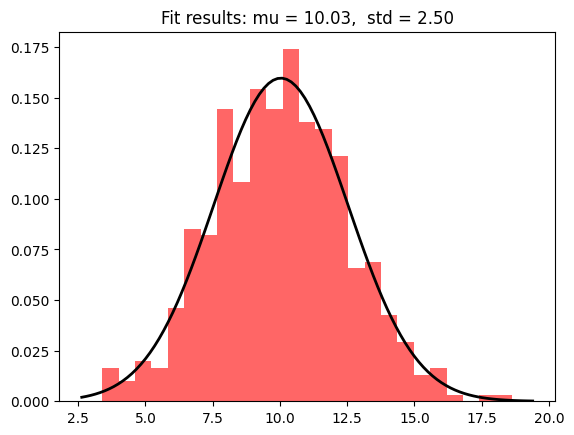

In [ ]:
from scipy.stats import norm
data = norm.rvs(10.0, 2.5, size=500)

# Fit a normal distribution to the data:
mu, std = norm.fit(data)

# Plot the histogram.
plt.hist(data, bins=25, density=True, alpha=0.6, color='r')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

  **CONCLUSION :**

* The analysis of customer demographics and spending behavior revealed differences between customers who responded to marketing campaigns and those who did not, particularly in various product categories.
* The provided dataset underwent essential data cleaning and preprocessing, including the handling of missing values and the conversion of different columns to a datetime object.
* Descriptive statistics were calculated for numerical variables, offering insights into the dataset's central tendencies and variations.
* While specific probability distributions were not explicitly determined, further exploration may be needed to assess their suitability and calculate probabilities and expected values.
* To derive more meaningful insights and actionable recommendations, a more comprehensive analysis, including statistical tests and machine learning models, is recommended to identify significant predictors of customer responses and refine marketing strategies.